In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
df = pd.read_csv("Fever.csv")

In [3]:
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
B,36.0,2.000000,0.828079,1.0,1.000,2.0,3.000,3.0
Volunteer,36.0,2.500000,1.133893,1.0,1.750,2.5,3.250,4.0
Relief,36.0,7.183333,3.272090,2.3,4.675,6.0,9.325,13.5


In [6]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

##  1.1

### Ingreadient A
#### Null Hypothesis : Average Relief hours are same for all three levels of Ingredient A in the compound
#### Alternate Hypothesis : Average Relief hours are different for atleast one level of Ingredient A in the compound

### Ingredient B
#### Null Hypothesis : Average Relief hours are same for all three levels of Ingredient B in the compound
#### Alternate Hypothesis : Average Relief hours are different for atleast one level of Ingredient B in the compound

## 1.2

### One way ANOVA 

In [4]:
formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


#### Since the p value is less than the significance level, we can reject the null hupothesis and state that there is a difference in the mean relief hours of different levels of Ingredient A

## 1.3

In [5]:
formula = 'Relief ~ C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


#### Since the p value is less than the significance level, we can reject the null hupothesis and state that there is a difference in the mean relief hours of different levels of Ingredient B¶


## 1.4

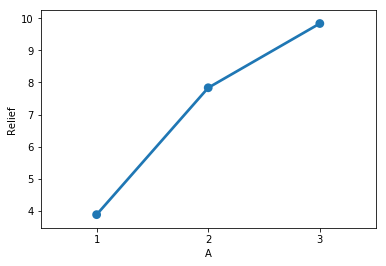

In [19]:
a = sns.pointplot(x='A', y='Relief', data=df, ci= None, estimator =mean)

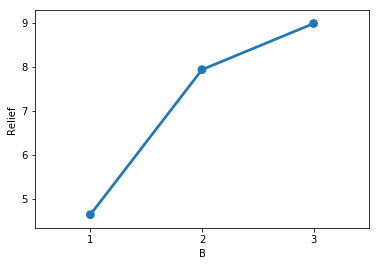

In [20]:
b = sns.pointplot(y='Relief', x='B', data=df, ci= None, estimator = mean)

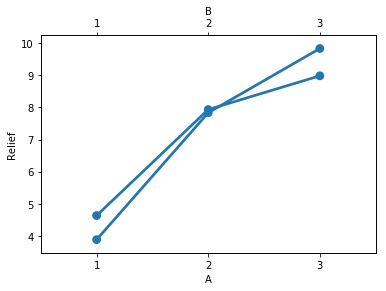

In [28]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
plot=sns.pointplot(x='A', y='Relief', data=df, ci= None, estimator =mean, ax=ax)
plot=sns.pointplot(x='B', y='Relief', data=df, ci= None, estimator =mean, ax=ax2)


####  From the above graph we can see that level 1 and 3 of Ingredient A are more effective than that of Ingredient B but level 2 of both Ingredients have same effect.There is some but not a defined relationship between the two ingredients A and B.

## 1.5 

### ANOVA with both variables

In [16]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


### ANOVA with all variables

In [17]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


We reject all three Null Hypothesis and conclude that the means are not same for different levels of both variables and there is an interaction between Ingredient A and B.

## Business Implications

1) From ANOVA One way Test, we can conclude that not all levels have equal implication on relief hours for both Ingredients A&B

2) From Scree Plot, we can see that Level 1 is most effective for both Ingredients A & B

3) It can also be observed that level 3 is the least effective for both ingredients A & B as the relief hours are more.

4) From the experiment, we can conclude that to minimize the relief hours (i.e. to provide faster relief to severe cases of hay fever), the new compund should be developed using level 1 of Ingredient A and B